In [9]:
#Q1 — Working with CSVs: read, inspect, dtypes
#a) Load sales_q1.csv into a DataFrame named df.
import pandas as pd
df=pd.read_csv(r'C:\Users\T2Gic\Downloads\sales_q1.csv')# had to unblock it

# Print the number of rows and columns.
a,b=df.shape
print(f'Number of rows:{a}')
print(f'Number of Columns:{b}')


Number of rows:9
Number of Columns:6


In [10]:
#b) Display the first 5 rows,
df.head()

,date,region,product,category,units,unit_price
0,2025-01-02,Nairobi,Chai,Drinks,120,2.5
1,2025-01-05,Mombasa,Coffee,Drinks,80,3.0
2,2025-01-09,Nairobi,Bread,Bakery,200,1.2
3,2025-02-01,Kisumu,Chai,Drinks,95,2.5
4,2025-02-10,Naivasha,Bread,Bakery,180,1.1


In [11]:
# the column names, 
df.columns


Index(['date', 'region', 'product', 'category', 'units', 'unit_price'], dtype='object')

In [12]:
# and the data types (df.dtypes)
df.dtypes

date           object
region         object
product        object
category       object
units           int64
unit_price    float64
dtype: object

In [13]:
#c) Convert date to datetime - changing the type of the column head
df['date']=pd.to_datetime(df['date'])

#Ensure units and unit_price are numeric (coerce errors if any).
df['units']=pd.to_numeric(df['units'], errors='coerce')
df['unit_price']=pd.to_numeric(df['unit_price'], errors='coerce')

# Show the updated dtypes.
print('Updated dtypes:\n',df.dtypes, '\n')
print(f'Updated dtypes:\n{df.dtypes}')

Updated dtypes:
 date          datetime64[ns]
region                object
product               object
category              object
units                  int64
unit_price           float64
dtype: object 

Updated dtypes:
date          datetime64[ns]
region                object
product               object
category              object
units                  int64
unit_price           float64
dtype: object


In [14]:
df.head()#shows the 1st 5 rows

,date,region,product,category,units,unit_price
0,2025-01-02,Nairobi,Chai,Drinks,120,2.5
1,2025-01-05,Mombasa,Coffee,Drinks,80,3.0
2,2025-01-09,Nairobi,Bread,Bakery,200,1.2
3,2025-02-01,Kisumu,Chai,Drinks,95,2.5
4,2025-02-10,Naivasha,Bread,Bakery,180,1.1


In [15]:
#d) Create a new column revenue = units * unit_price.
df['revenue'] = df['units'] * df['unit_price']
print(df['revenue'])# has 9 rows


0    300.0
1    240.0
2    240.0
3    237.5
4    198.0
5    270.0
6    390.0
7    252.0
8    212.5
Name: revenue, dtype: float64


In [16]:
# Print the total revenue and the average revenue per row.
print(f'Total revenue={df['revenue'].sum()}')
print(f'Average revenue per row ={df['revenue'].mean()}')

Total revenue=2340.0
Average revenue per row =260.0


In [17]:
#Q2 — Filtering, selection, summary stats
#a) Filter rows where region == 'Nairobi' and category == 'Drinks'. 
# Show the filtered DataFrame.
filtered_df = df[(df['region']=='Nairobi') & (df['category']=='Drinks')] #2 rows with the exact requirements
print(filtered_df)

        date   region product category  units  unit_price  revenue
0 2025-01-02  Nairobi    Chai   Drinks    120         2.5    300.0
6 2025-03-01  Nairobi  Coffee   Drinks    130         3.0    390.0


In [18]:
#b) Overall mean, median, and standard deviation of the entire 'units' column
print(f'Mean= {df['units'].mean()}')
print(f'Median={df['units'].median()}')
print(f'Standard Deviation={df['units'].std()}')


Mean= 138.88888888888889
Median=130.0
Standard Deviation=49.16666666666667


In [19]:
#bi) Compute the mean, median, and standard deviation of units for each category (groupby).
#There are 2 categories
#Use the groupby function
a = df.groupby('category')['units'].agg(['mean', 'median', 'std'])
print(a)

           mean  median        std
category                          
Bakery    185.0   190.0  26.457513
Drinks    102.0    95.0  21.965883


In [20]:
# c) Find the top-3 products by total revenue (use groupby).
# 1st multiply products by total revenue then arrange top-3 products= descending order
a=df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(3)
print(a)

product
Chai      750.0
Bread     690.0
Coffee    630.0
Name: revenue, dtype: float64


In [23]:
# d) Handle missing values: imagine units has some missing entries—
# write code to count missing, 
print(f'Total number of missing values:{df['units'].isnull().sum()}')

Total number of missing values:0


In [ ]:
#Can't be done for this question since there're no missing values
# fill with median per product
df['units'].fillna(df.groupby('product')['units'].transform('median'), inplace=True)

# Recompute revenue after filling NaNs
df['revenue'] = df['units'] * df['unit_price']
new_total_revenue = df['revenue'].sum()
print(f"New total revenue after filling NaNs: ${new_total_revenue:,.2f}\n")

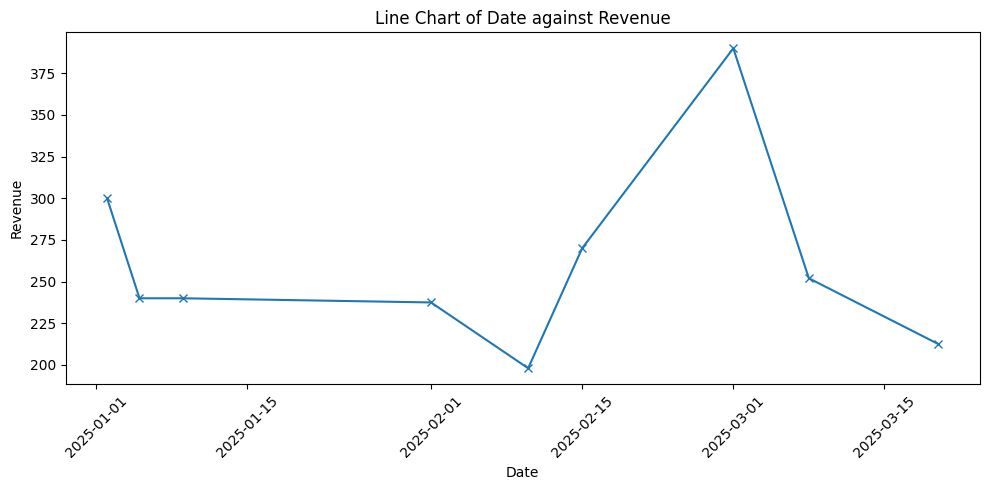

In [31]:
#Q3 — Plotting with Matplotlib from DataFrames
# a) Create a daily revenue line chart: x = date, y = revenue.
# Label x/y axes and add a descriptive title.
# Rotate x-ticks for readability.
import matplotlib.pyplot as plt
a=df.groupby('date')['revenue'].sum()
plt.figure(figsize=(10,5))
plt.plot(a.index, a.values, marker='x', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Line Chart of Date against Revenue')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
#b) Create a grouped bar chart showing total revenue per category by month (Jan/Feb/Mar).
# Hint: create a month column from date (e.g., df['month'] = df['date'].dt.month_name()).c) 
df['month'] = df['date'].dt.month_name()
print(df['month'])

0     January
1     January
2     January
3    February
4    February
5    February
6       March
7       March
8       March
Name: month, dtype: object


C:\Users\T2Gic\AppData\Local\Temp\ipykernel_28016\1747341348.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Category')


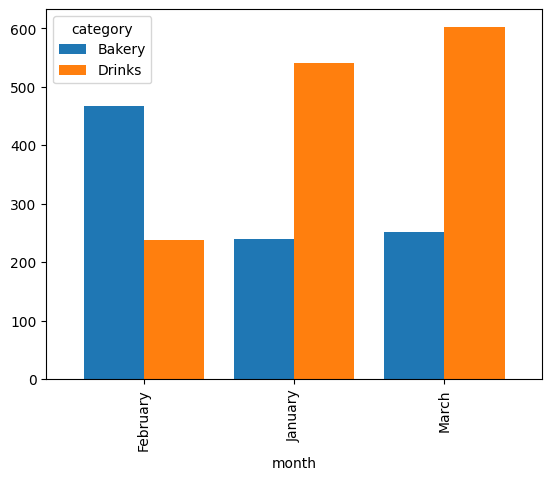

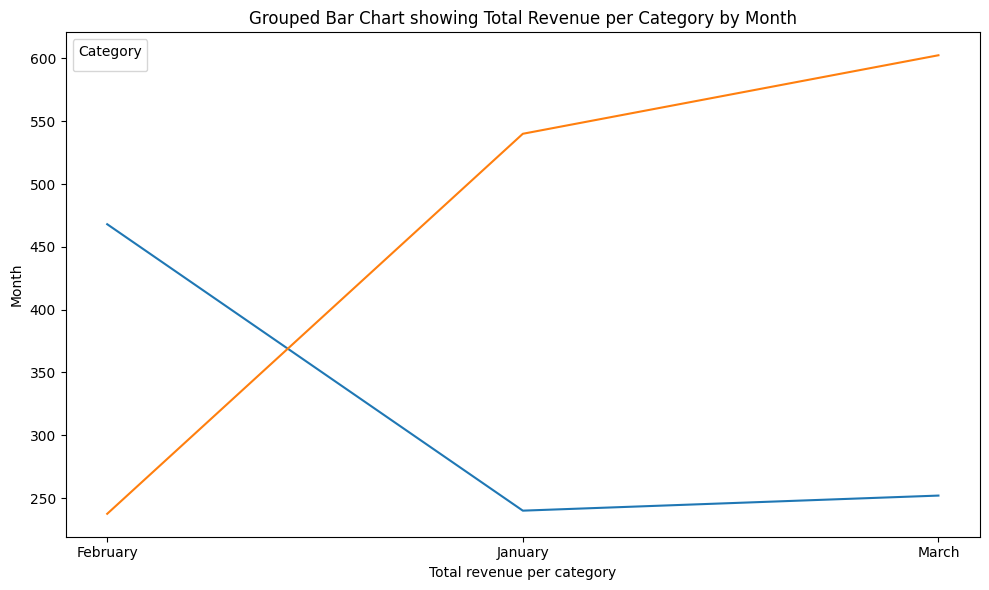

In [40]:
#bi) Create a grouped bar chart showing total revenue per category by month (Jan/Feb/Mar).
# Pivot table to get data in correct format
a= df.groupby(['month', 'category'])['revenue'].sum().unstack()
a.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.figure(figsize=(10,6))
plt.plot(a.index, a.values)
plt.xlabel('Total revenue per category')
plt.ylabel('Month')
plt.title('Grouped Bar Chart showing Total Revenue per Category by Month')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

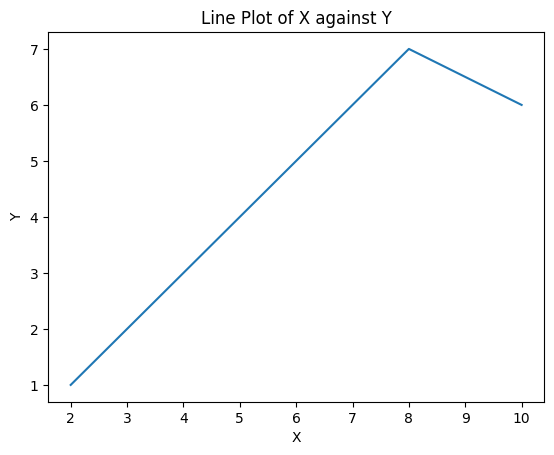

In [ ]:
#Making a line plot
import matplotlib.pyplot as plt
plt.title('Line Plot of X against Y')
plt.xlabel('X')
plt.ylabel('Y')
x=[2,4,6,8,10] #x and y must be the same length
y=[1,3,5,7,6]
plt.plot(x,y)
plt.show()

#Bar plot instead of plt.plot use plt.bar- has x and y
#Histogram plt.show()- has only x
#Scatter plot plt.scatter- has x and y


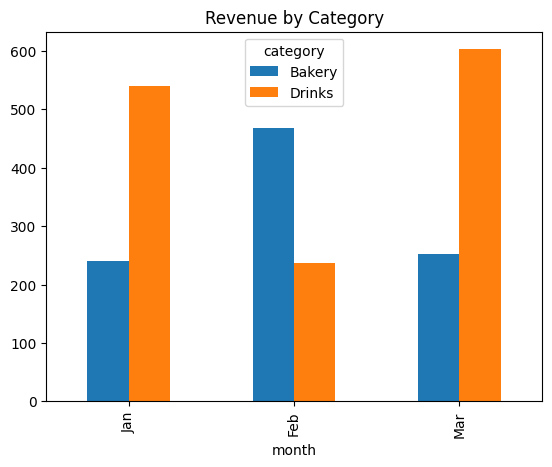

In [47]:
# Q. Create a grouped bar chart showing total revenue per category by month (Jan/Feb/Mar).
#The first line creates a new column called `month` by extracting the month name from the `date` column and shortening it to the first three letters (e.g., “Jan”, “Feb”, “Mar”) for easier grouping.
# The second line builds a pivot table that summarizes total revenue for each combination of month and category, with months as rows, categories as columns, and summed revenue as the values. 
# The third line reorders the pivot table so that the months appear in calendar order—January, February, and March—rather than alphabetical or random order. 
# Finally, the last line plots the pivot table as a grouped bar chart, where each month is a group on the x-axis and each category is represented by a separate bar within that group, adds a title to the chart, and displays it.
df['month'] = df['date'].dt.month_name().str[:3]
pivot = df.pivot_table(index='month', columns='category', values='revenue', aggfunc='sum')
pivot = pivot.reindex(['Jan','Feb','Mar'])
pivot.plot(kind='bar'); plt.title('Revenue by Category'); plt.show()
